In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/College/sem\ 7

/content/drive/My Drive/College/sem 7


In [ ]:
ls

 AccVal_acc_16.png     test/    TransferLearningResnet50.ipynb   Transfer_Learning_VGG_19.ipynb
 LossVal_loss_16.png   train/   Transfer_Learning_VGG_16.ipynb  "UT1'_PP.ipynb"


In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [ ]:
# Import the Resnet library as shown below and add preprocessing layer to the front of Resnet
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-16-6ec5a35725ca>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
163/163 [==============================] - 1331s 8s/step - loss: 0.7199 - accuracy: 0.7864 - val_loss: 0.3714 - val_accuracy: 0.8397
Epoch 2/5
163/163 [==============================] - 1161s 7s/step - loss: 0.3735 - accuracy: 0.8436 - val_loss: 0.5915 - val_accuracy: 0.7580
Epoch 3/5
163/163 [==============================] - 1193s 7s/step - loss: 0.3020 - accuracy: 0.8758 - val_loss: 0.3058 - val_accuracy: 0.8766
Epoch 4/5
163/163 [==============================] - 1161s 7s/step - loss: 0.3203 - accuracy: 0.8746 - val_loss: 0.3078 - val_accuracy: 0.8766
Epoch 5/5
163/163 [==============================] - 1192s 7s/step - loss: 0.2793 - accuracy: 0.8907 - val_loss: 0.9240 - val_accuracy: 0.6987


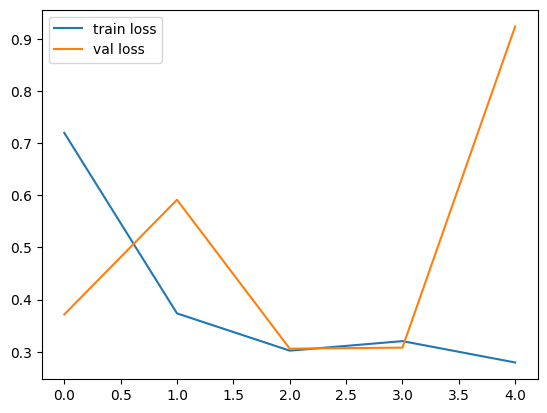

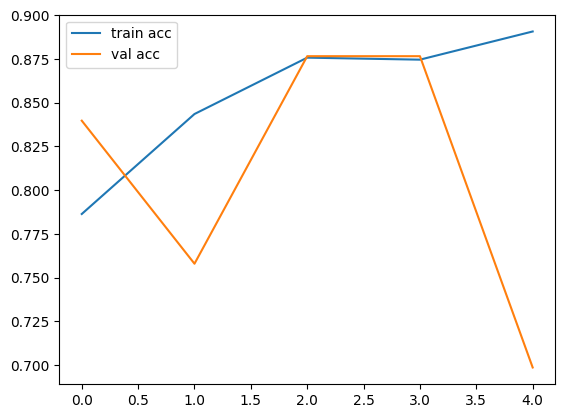

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_resnet50')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_16')

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_set, len(test_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Pneumonia','Normal']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

<ipython-input-18-19b2a6e7ef7e>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set, len(test_set))


Confusion Matrix
[[ 46 188]
 [  0 390]]
Classification Report
              precision    recall  f1-score   support

   Pneumonia       1.00      0.20      0.33       234
      Normal       0.67      1.00      0.81       390

    accuracy                           0.70       624
   macro avg       0.84      0.60      0.57       624
weighted avg       0.80      0.70      0.63       624

